In [18]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
IMG_SIZE = 100  # Resize all images to 100x100
TRAIN_DIR = "train/train"
TEST_DIR = "test/test"

In [7]:
X = []
Y = []

for file in os.listdir(TRAIN_DIR):
    if file.endswith(".jpg"):
        label = 0 if "cat" in file.lower() else 1
        path = os.path.join(TRAIN_DIR, file)
        img = cv2.imread(path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img)
        Y.append(label)

X = np.array(X) / 255.0
Y = to_categorical(Y, 2)

In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training Data:", X_train.shape, Y_train.shape)
print("Validation Data:", X_val.shape, Y_val.shape)

Training Data: (20000, 100, 100, 3) (20000, 2)
Validation Data: (5000, 100, 100, 3) (5000, 2)


In [19]:
# Define the model
model = Sequential()

# 1st Convolution + MaxPooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolution + MaxPooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolution + MaxPooling
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten before Dense
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Dropout layer to reduce overfitting
model.add(Dropout(0.5))  # Drop 50% of the neurons during training

# Output layer (2 neurons for cat vs dog)
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model with validation split
history = model.fit(X_train, Y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop])


Epoch 1/20
500/500 [==============================] - 69s 133ms/step - loss: 0.6341 - accuracy: 0.6321 - val_loss: 0.5901 - val_accuracy: 0.6687
Epoch 2/20
500/500 [==============================] - 58s 115ms/step - loss: 0.5219 - accuracy: 0.7421 - val_loss: 0.5029 - val_accuracy: 0.7545
Epoch 3/20
500/500 [==============================] - 57s 114ms/step - loss: 0.4472 - accuracy: 0.7953 - val_loss: 0.4008 - val_accuracy: 0.8202
Epoch 4/20
500/500 [==============================] - 56s 113ms/step - loss: 0.3918 - accuracy: 0.8244 - val_loss: 0.3913 - val_accuracy: 0.8270
Epoch 5/20
500/500 [==============================] - 57s 113ms/step - loss: 0.3427 - accuracy: 0.8519 - val_loss: 0.3721 - val_accuracy: 0.8353
Epoch 6/20
500/500 [==============================] - 57s 114ms/step - loss: 0.2905 - accuracy: 0.8739 - val_loss: 0.4132 - val_accuracy: 0.8265
Epoch 7/20
500/500 [==============================] - 56s 113ms/step - loss: 0.2462 - accuracy: 0.9003 - val_loss: 0.3861 - val_ac

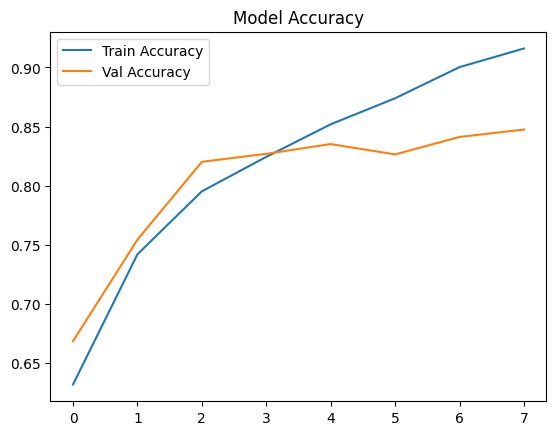

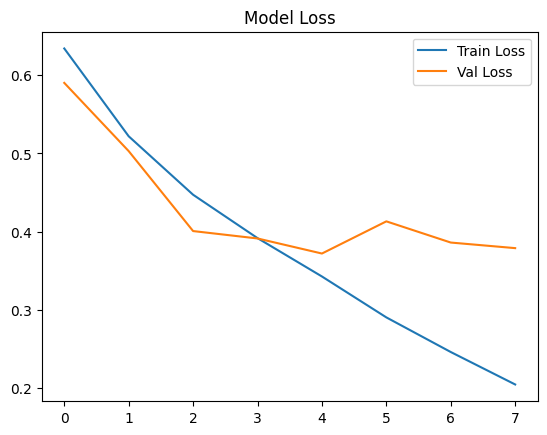

In [20]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")
plt.show()


In [12]:
X_test = []
filenames = []

for file in os.listdir(TEST_DIR):
    if file.endswith(".jpg"):
        path = os.path.join(TEST_DIR, file)
        img = cv2.imread(path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X_test.append(img)
        filenames.append(file)

X_test = np.array(X_test) / 255.0
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)


391/391 [==============================] - 10s 25ms/step


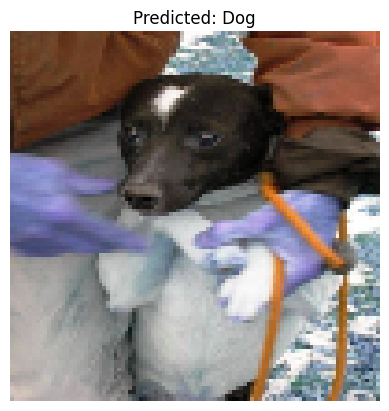

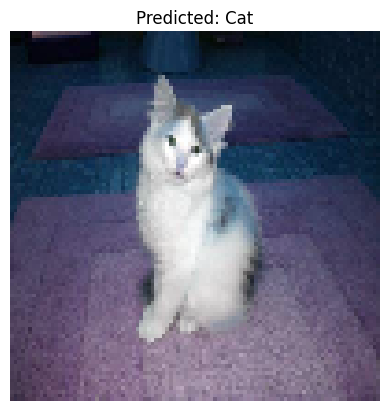

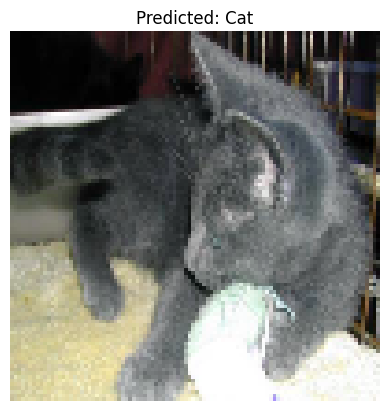

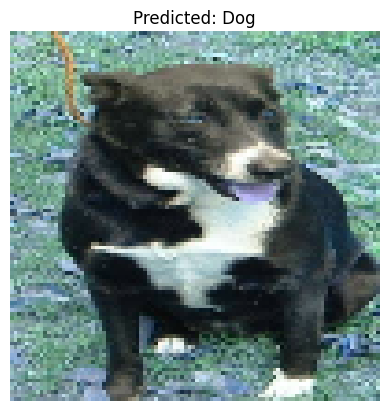

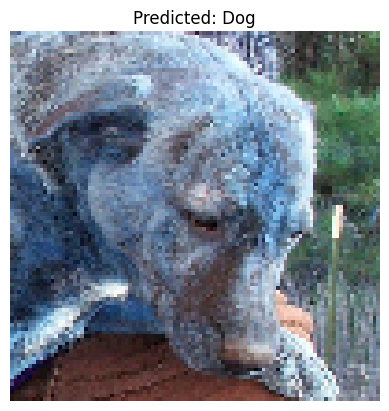

In [21]:
for i in range(5):
    plt.imshow(X_test[i])
    plt.title("Predicted: " + ("Cat" if predicted_classes[i] == 0 else "Dog"))
    plt.axis('off')
    plt.show()